# <center> R1.04 Méthodes d'optimisation <br> TP1a - Descente de gradient 1D </center>
<center> 2023/2024 - Tom Ferragut & Thibault Godin & Lucie Naert </center>
<center> IUT de Vannes, BUT Informatique </center>

Le but de ce TP est d'implémenter quelques méthodes numériques d'optimisation, basées sur la descente de gradient, dont le cœur est résumé par :

$$a_{k+1} = a_k -  \delta f'(a_k)$$

In [30]:
import numpy as np
import math

# Affichage graphique

%matplotlib widget
# enable interactivity of plots
# attention a bien fermer les fenetres plt après chaque visualisalgèbreation

%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

import time


# Descente de gradient


## Exercice 1 : Optimisation de la fonction $f: x \mapsto x^2 +1$

Le but de cet exercice est d'implémenter la méthode (la plus basique) de descente de gradient, en 1D.


On va considérer la fonction $f: x \mapsto x^2 +1$

**Question 1** 

Calculer $f'$ et dresser le tableau de variation de $f$.

En déduire que $f$ admet un unique minimum sur $\mathbb{R}$ et le donner.

_Réponse :_
Pour calculer la dérivée $f'$ de $f$, on utilise les règles de dérivation des fonctions polynomiales. Ainsi, $f'(x) = 2x$.
Pour dresser le tableau de variation de $f$, on observe que la dérivée $f'(x) = 2x$ change de signe au point $x=0$ (elle est négative pour $x < 0$ et positive pour $x > 0$), ce qui indique que la fonction $f$ est décroissante avant $x=0$ et croissante après. Comme $f(x)$ est une parabole ouverte vers le haut avec son sommet en $(0, 1)$, on peut conclure qu'elle admet un minimum unique en ce point. Le minimum de $f$ sur $\mathbb{R}$ est donc $f(0) = 0^2 + 1 = 1$.

**Question 2** 

Écrire une fonction `gradDesc_ex1(x0,k,d)` qui implémente la descente de gradient pour la fonction $f$ ci-dessus (on considère que la dérivée est connue). x0 étant l'abscisse de départ, k le nombre d'itérations et d représentant le pas $\delta$.

_Note : pour débugger, il peut être interessant d'afficher les résultats intermédiaires (ajout possible d'un paramètre booléen <tt>verbose</tt>)_

In [31]:
def gradDesc_ex1(x0, k, d, verbose = False):
    x = x0
    for i in range(k):
        x = x - d * 2 * x  # Mise à jour de x en utilisant la dérivée de f
        if verbose:
            print(f"Iteration {i+1}: x = {x}, f(x) = {x**2 + 1}")
    return x

minimum = gradDesc_ex1(1, 10, 0.2, verbose = True)
print(f"\nMinimum atteint en x = {minimum}, f(x) = {minimum**2 + 1}")


Iteration 1: x = 0.6, f(x) = 1.3599999999999999
Iteration 2: x = 0.36, f(x) = 1.1296
Iteration 3: x = 0.216, f(x) = 1.046656
Iteration 4: x = 0.1296, f(x) = 1.01679616
Iteration 5: x = 0.07776, f(x) = 1.0060466176
Iteration 6: x = 0.046655999999999996, f(x) = 1.002176782336
Iteration 7: x = 0.027993599999999997, f(x) = 1.00078364164096
Iteration 8: x = 0.016796159999999997, f(x) = 1.0002821109907456
Iteration 9: x = 0.010077695999999997, f(x) = 1.0001015599566685
Iteration 10: x = 0.006046617599999998, f(x) = 1.0000365615844007

Minimum atteint en x = 0.006046617599999998, f(x) = 1.0000365615844007


**Question 3**

Ecrire une fonction `gradDescVect_ex1` dans laquelle vous modifierez la fonction précédente <tt>gradDesc_ex1</tt> afin de renvoyer deux vecteurs : le premier listant les points $x$ visités par l'algorithme, le deuxième les valeurs prises par le gradient en chaque point.

La fonction `graphique_descente_ex1` utilise le résultat de <tt>gradDescVect_ex1</tt> pour donner une représentation graphique de la descente de gradient.

In [32]:
def gradDescVect_ex1(x0, k, d):
    x = x0
    liste_X = [x0]
    liste_grad = [2 * x0]
    
    for _ in range(k):
        grad = 2 * x
        x = x - d * grad
        liste_X.append(x)
        liste_grad.append(2 * x)
    
    return liste_X, liste_grad


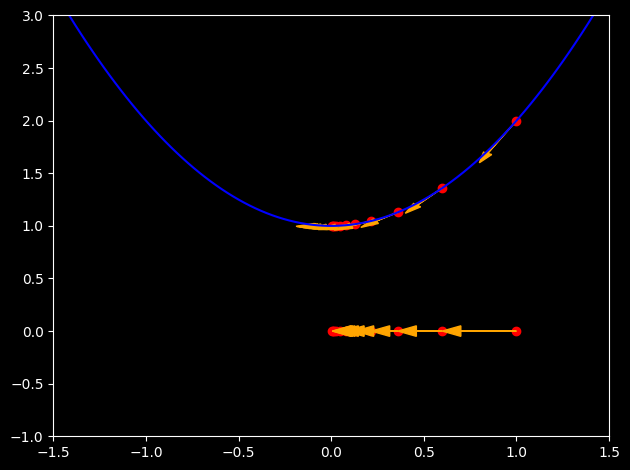

-1

In [33]:
def graphique_descente_ex1(x0,k,d):
    # inspiré de A. BODIN et F. RECHER    
    xmin, xmax = -1.5 * x0, 1.5 * x0
    plt.axis([xmin, xmax, -1, x0**2 + 2])
     
    num = 100
    VX = np.linspace(xmin, xmax, num)
    # 1 Graphe de la fonctions
    VY = VX**2 + 1
    plt.plot(VX, VY, color='blue')

    # 2. Points et gradients sur l'axe
    liste_X, liste_grad = gradDescVect_ex1(x0, k, d)
    for x in liste_X: # points
        plt.scatter(x, 0, color ='red')
    
    for i in range(len(liste_X) - 1): # flèches
        plt.arrow(liste_X[i], 0, -d * liste_grad[i], 0, linewidth = 1, color = 'orange', length_includes_head = True, head_width = 0.1, head_length = 0.1)

    # 3. Points et gradients sur le graphe
    for x in liste_X: # points
        plt.scatter(x, x**2+1, color='red')
    
    for i in range(len(liste_X) - 1): # flèches
        plt.arrow(liste_X[i], liste_X[i]**2 + 1, -d, -d * liste_grad[i], linewidth = 1, color = 'orange', length_includes_head = True, head_width = 0.05, head_length = 0.1)

    plt.tight_layout()
    plt.show()
    return -1

graphique_descente_ex1(x0 = 1, k = 10, d = 0.2)


## Exercice 2 : Optimisation d'une fonction dérivable $f$ dont on connait la dérivée $f'$

**Question 1**

1. Ecrire une fonction `gradDesc_ex2(f,fp,x0,k,d)` qui produit le même résultat que <tt>gradDesc_ex1</tt> mais pour une fonction quelconque <tt>f</tt> dont on connait la dérivée <tt>fp</tt>. 

2. Remarquer que les résultats obtenus sont bien les mêmes que pour l'exercice 1

3. Ecrire une fonction `gradDescVect_ex2(f,fp,x0,k,d)` qui produit les mêmes résultats que <tt>gradDescVect_ex1</tt> mais pour une fonction quelconque <tt>f</tt> dont on connait la dérivée <tt>fp</tt>. 

La fonction `graphique_descente_ex2` utilise le résultat de <tt>gradDescVect_ex2</tt> pour donner une représentation graphique de la descente de gradient.

In [34]:
def gradDesc_ex2(f, fp, x0, k, d):
    x = x0
    for _ in range(k):
        x = x - d * fp(x)
    return x

def f(x):
    return x**2 + 1

def fp(x):
    return 2*x

print("Obtient-on les mêmes résultats pour le cas x^2 +1 ?", gradDesc_ex2(f, fp, 1, 10, 0.2) == gradDesc_ex1(1, 10, 0.2))


Obtient-on les mêmes résultats pour le cas x^2 +1 ? True


In [35]:
def gradDescVect_ex2(f, fp, x0, k, d):
    x = x0
    liste_X = [x0]
    liste_grad = [fp(x0)]
    
    for _ in range(k):
        grad = fp(x)
        x = x - d * grad
        liste_X.append(x)
        liste_grad.append(fp(x))
    
    return liste_X, liste_grad


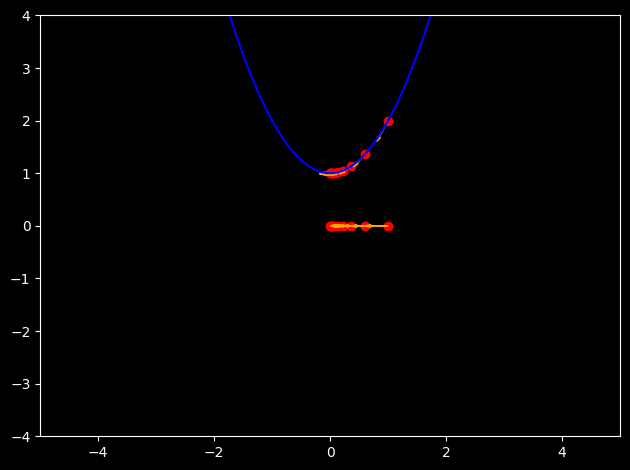

-1

In [36]:
def graphique_descente_ex2(f, fp, x0, k, d):
    # inspiré de A. BODIN et F. RECHER    
    xmin, xmax = -3 * x0, 3 * x0
    plt.axis([xmin, xmax, -2, 2])
    
    xmin, xmax = -5 * x0, 5 * x0
    plt.axis([xmin, xmax, -2 * f(x0), 2 * f(x0)])
     
    num = 100
    VX = np.linspace(xmin, xmax, num)
    # 1 Graphe de la fonctions
    VY = f(VX)
    plt.plot(VX, VY, color = 'blue')

    # 2. Points et gradients sur l'axe
    liste_X, liste_grad = gradDescVect_ex2(f, fp, x0, k, d)
    for x in liste_X: # points
        plt.scatter(x, 0, color = 'red')
    
    for i in range(len(liste_X) - 1): # flèches
        plt.arrow(liste_X[i], 0, -d * liste_grad[i], 0, linewidth = 1, color = 'orange', length_includes_head = True, head_width = 0.05, head_length = 0.1)

    # 3. Points et gradients sur le graphe
    for x in liste_X: # points
        plt.scatter(x, f(x), color = 'red')
    
    for i in range(len(liste_X) - 1): # flèches
        plt.arrow(liste_X[i], f(liste_X[i]), -d, -d * liste_grad[i], linewidth = 1, color = 'orange', length_includes_head = True, head_width = 0.05, head_length = 0.1)

    plt.tight_layout()

    plt.show()
    return -1

graphique_descente_ex2(f, fp, 1, 10, 0.2)


__Question 2 : Exemple de problème d'optimisation__

Un industriel cherche à optimiser la quantité de métal utilisée pour la fabrication d’une boite de conserve. Nous avons vu en début de cours que la surface $S$ de métal utilisée dépendait du rayon $r$ de la boite (nous fixons le volume à 425mL).

$$S(r) = 2\pi r^2 + \frac{2V}{r}$$

En utilisant la descente de gradient et les fonctions définies précédemment, donner une approximation du rayon permettant d'utliser le moins de métal possible pour produire la boite. A quelle surface ce rayon correspond-il ?

In [37]:
V = 0.425

def f(r):
    return 2 * np.pi * r**2 + (2 * V) / r

def fp(r):
    return 4 * np.pi * r - (2 * V) / (r**2)

x0 = 1
k = 20
d = 0.02
rMin = gradDesc_ex2(f, fp, x0, k, d)

print("Le rayon minimal trouvé en", k, "pas est de", rMin)
print("La surface correspondante est égale à", f(rMin))


Le rayon minimal trouvé en 20 pas est de 0.407445651613783
La surface correspondante est égale à 3.1292517050455997


**Question 3** 

À l'aide des widgets suivant, observer l'influence des paramètres $k$ et $d$. Commentez

In [44]:
from ipywidgets import interact, fixed

def f(x):
    return np.sin(x)

def fp(x):
    return np.cos(x)

interact(graphique_descente_ex2, f = fixed(f), fp = fixed(fp), x0 = fixed(1), k = (0, 50, 1), d = (0., .5, 0.005))


interactive(children=(IntSlider(value=25, description='k', max=50), FloatSlider(value=0.25, description='d', m…

<function __main__.graphique_descente_ex2(f, fp, x0, k, d)>

In [43]:
interact(graphique_descente_ex2, f = fixed(f), fp = fixed(fp), x0 = fixed(1), k = (0, 50, 1), d = (0., 4, 0.005))


interactive(children=(IntSlider(value=25, description='k', max=50), FloatSlider(value=2.0, description='d', ma…

<function __main__.graphique_descente_ex2(f, fp, x0, k, d)>

__Influence de k :__
Le paramètre $k$ contrôle le nombre d'itérations de l'algorithme de descente de gradient. Une valeur plus élevée permet à l'algorithme de faire plus de pas dans la direction du gradient, potentiellement permettant une convergence plus précise vers un minimum local ou global, selon la nature de la fonction.
- Avec un faible nombre d'itérations ($k$ petit), l'algorithme peut ne pas avoir suffisamment de temps pour converger vers le minimum, surtout si le point de départ est éloigné du minimum ou si le pas de descente est petit. Cela peut aboutir à une approximation grossière du minimum.
- Avec un nombre élevé d'itérations ($k$ grand), l'algorithme a plus de chances de converger vers le minimum si le pas de descente est correctement choisi. Cependant, après un certain point, augmenter davantage le nombre d'itérations n'apportera pas de bénéfice significatif en termes de précision mais augmentera le temps de calcul.

__Influence de d :__
Le pas de descente $d$ détermine la taille des pas effectués dans la direction opposée au gradient. Sa valeur a un impact significatif sur la vitesse de convergence et la stabilité de l'algorithme.
- Avec un petit pas de descente ($d$ faible), l'algorithme fait de petits pas, ce qui peut conduire à une convergence très lente vers le minimum. Cela peut être efficace pour éviter de dépasser le minimum, mais cela nécessite généralement un nombre plus élevé d'itérations pour atteindre une précision acceptable.
- Avec un grand pas de descente ($d$ élevé), l'algorithme fait de grands pas. Cela peut accélérer la convergence vers le minimum si le pas n'est pas trop grand. Toutefois, si le pas est excessivement grand, l'algorithme peut osciller autour du minimum ou, pire, diverger, en particulier pour les fonctions non linéaires ou ayant de multiples minima locaux.


## Exercice 3 : Cas d'une fonction dont on ne connait pas la dérivée

Le but de cette dernière partie est de proposer un algorithme pour utiliser la méthode du gradient


Pour cela, on utilise :

$$f'(x) = \lim_{t \to 0} \frac{f(x)-f(x+t)}{t} \approx \frac{f(x)-f(x+\varepsilon)}{\varepsilon}$$


_Remarque stabilité numérique :  on prend généralement un petit epsilon que l'on fixe, par exemple $\varepsilon = 10^{-5}$ et l'on symétrise, on choisira donc :_
$$f'(x)  \approx \frac{f(x+\varepsilon)-f(x-\varepsilon)}{2\varepsilon}$$

_Remarque python_ : on pourra utiliser les lambda expressions pour recycler le code précédent https://www.w3schools.com/python/python_lambda.asp


1. Ecrire une fonction `fp_approx` qui donne l'approximation de la dérivée au point x en utilisant la formule précédente. 

2. Pour la fonction donnée, écrire la fonction `fp` donnant sa dérivée exacte. Comparer les résultats en un point.

3. Faire la descente de gradient en utilisant <tt>fp_approx</tt> pour trouver le minimum

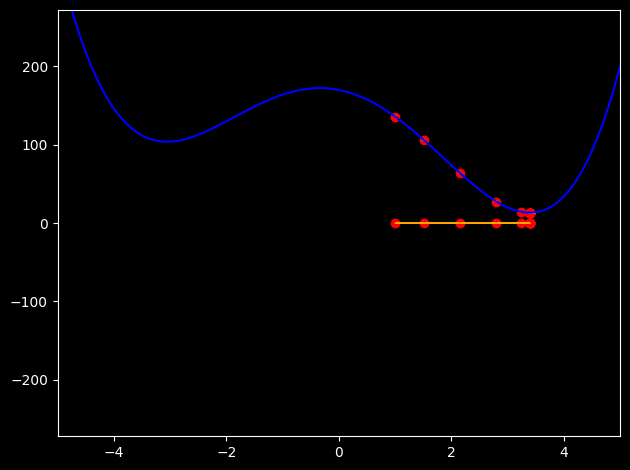

-1

In [49]:
eps = 1e-5

def fp_approx(f, x):
    return (f(x + eps) - f(x - eps)) / (2 * eps)

def f(x):
    return (x**2 - 11)**2 + (x - 7)**2

#dérivée -14 - 42*x + 4*x**3
graphique_descente_ex2(f, lambda x : fp_approx(f, x), 1, 20, .01)
